In [1]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
from scipy.stats import pearsonr, spearmanr
import h3pandas
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pickle
from warnings import filterwarnings
import matplotlib.colors as colors
import geopandas as gpd 
import sys
import os
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import matplotlib

from plotting_utils import get_color_dict
color_dict = get_color_dict()

filterwarnings('ignore')
tqdm.pandas()

plt.rcParams.update({'font.family':'arial'})



## Arrival_date

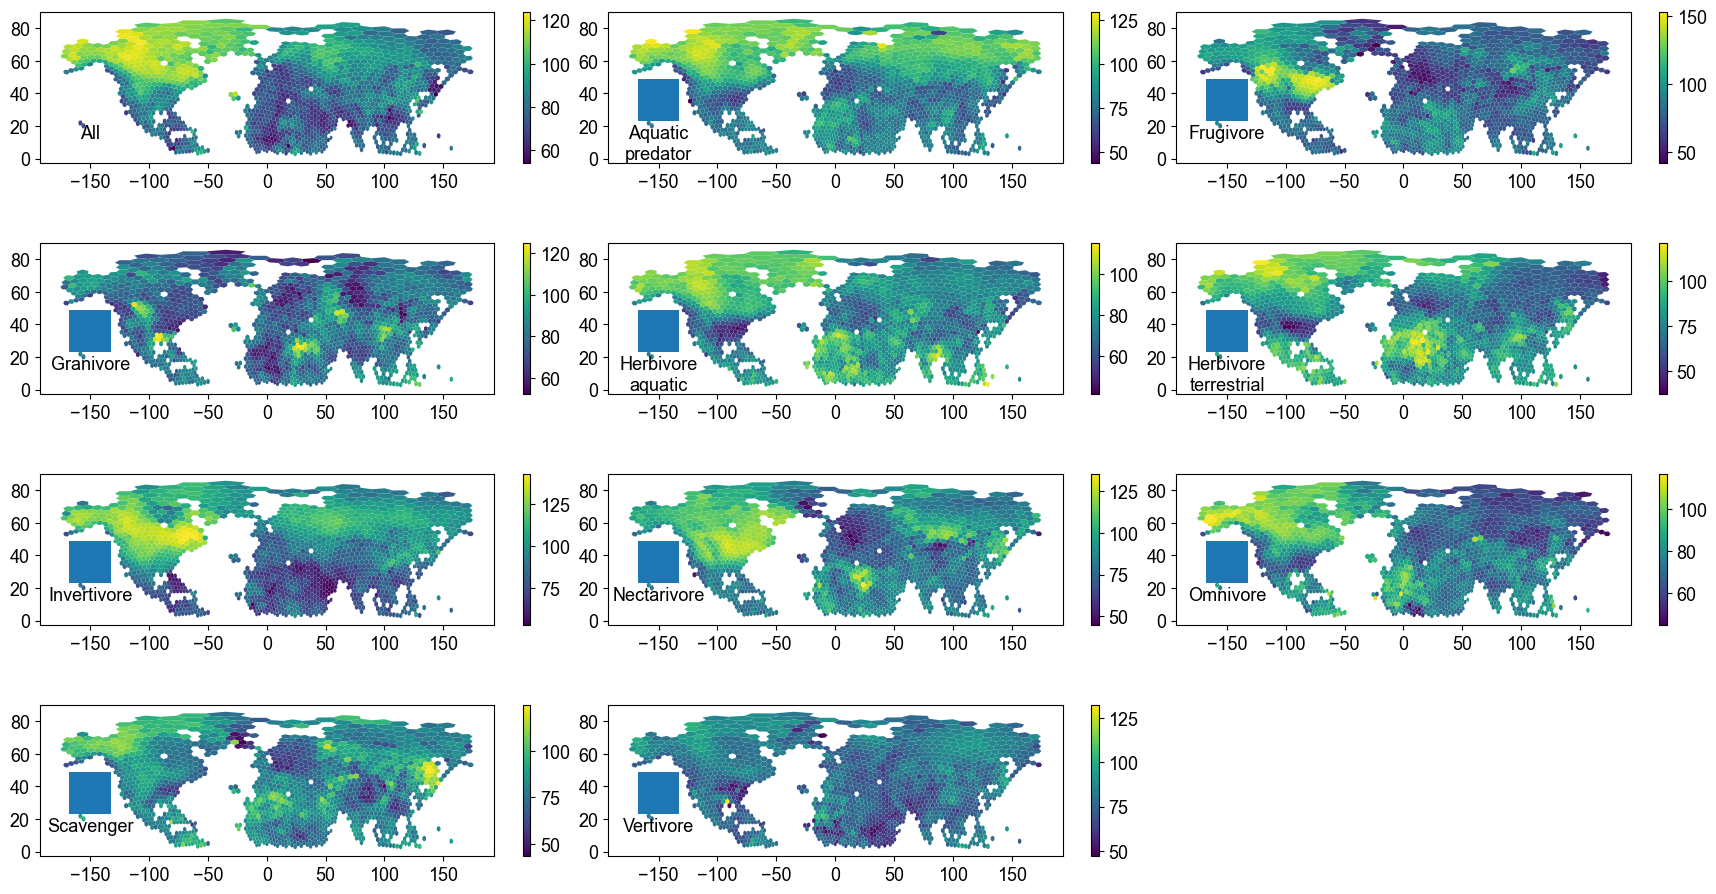

In [2]:
fig,axs = plt.subplots(4,3,figsize=((11/2) * 4, (8/2)*3))
for niche_count, niche in enumerate(color_dict.keys()):
    
    ax = axs[niche_count // 3, niche_count % 3]
    
    data = pd.read_csv(f'../../data/D07.BYM2_summary/modeling_data_with_posterior_est_niche_{niche}_env_tmin.csv')
    data = data.groupby(['h3_02','lng','lat'])[['mean_DOY_peak']].mean().reset_index(drop=False)\
            .set_index('h3_02').h3.h3_to_geo_boundary().reset_index(drop=False)
    data.plot('mean_DOY_peak', ax = ax,legend=False)
    
    vmin, vmax = data['mean_DOY_peak'].min(), data['mean_DOY_peak'].max()

    norm = matplotlib.colors.Normalize(vmin=max(vmin, 0), vmax=vmax)

    cbar = plt.cm.ScalarMappable(norm=norm, cmap='viridis')
    cb = plt.colorbar(cbar, ax=ax, shrink=0.65)
    # cb.set_label(label="Sensitivity to temperature", fontsize=15)

    cb.set_ticks([i for i in cb.get_ticks() if not (i > vmax or i < vmin)])
    cb.set_ticklabels(["{:.0f}".format(float(i)) for i in cb.get_ticks()], fontsize=13)

    # add annotation
    import skunk
    from matplotlib.offsetbox import AnnotationBbox
    size=(30,30)
    
    if not niche == 'all':
        box = skunk.Box(size[0], size[1], niche)
        ab = AnnotationBbox(box, (-150,36),
                    xycoords='data',
                    boxcoords='data',
                    frameon=False)
        ax.add_artist(ab)
        
    ax.annotate(niche.split('Trophic_Niche_')[-1].replace('_',' ').capitalize().replace(' ','\n'),
            xy=(-150,21),  # Position to place the annotation text
            fontsize=13,
            ha='center',va='top')
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=13)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=13)
    
# plt.tight_layout()
fig.subplots_adjust(wspace=0, hspace=0)
axs[3, 2].remove()

svg = skunk.insert({niche:f"../../silhouette/SVG/{niche}.svg" for niche in color_dict.keys() if not niche == 'all'})

import cairosvg
cairosvg.svg2pdf(bytestring=svg, write_to='Arrival_date.pdf')

# plt.tight_layout()
# fig.subplots_adjust(wspace=0, hspace=0) #left=0.1, right=0.9, top=0.9, bottom=0.1, 




## Arrival_date_variation

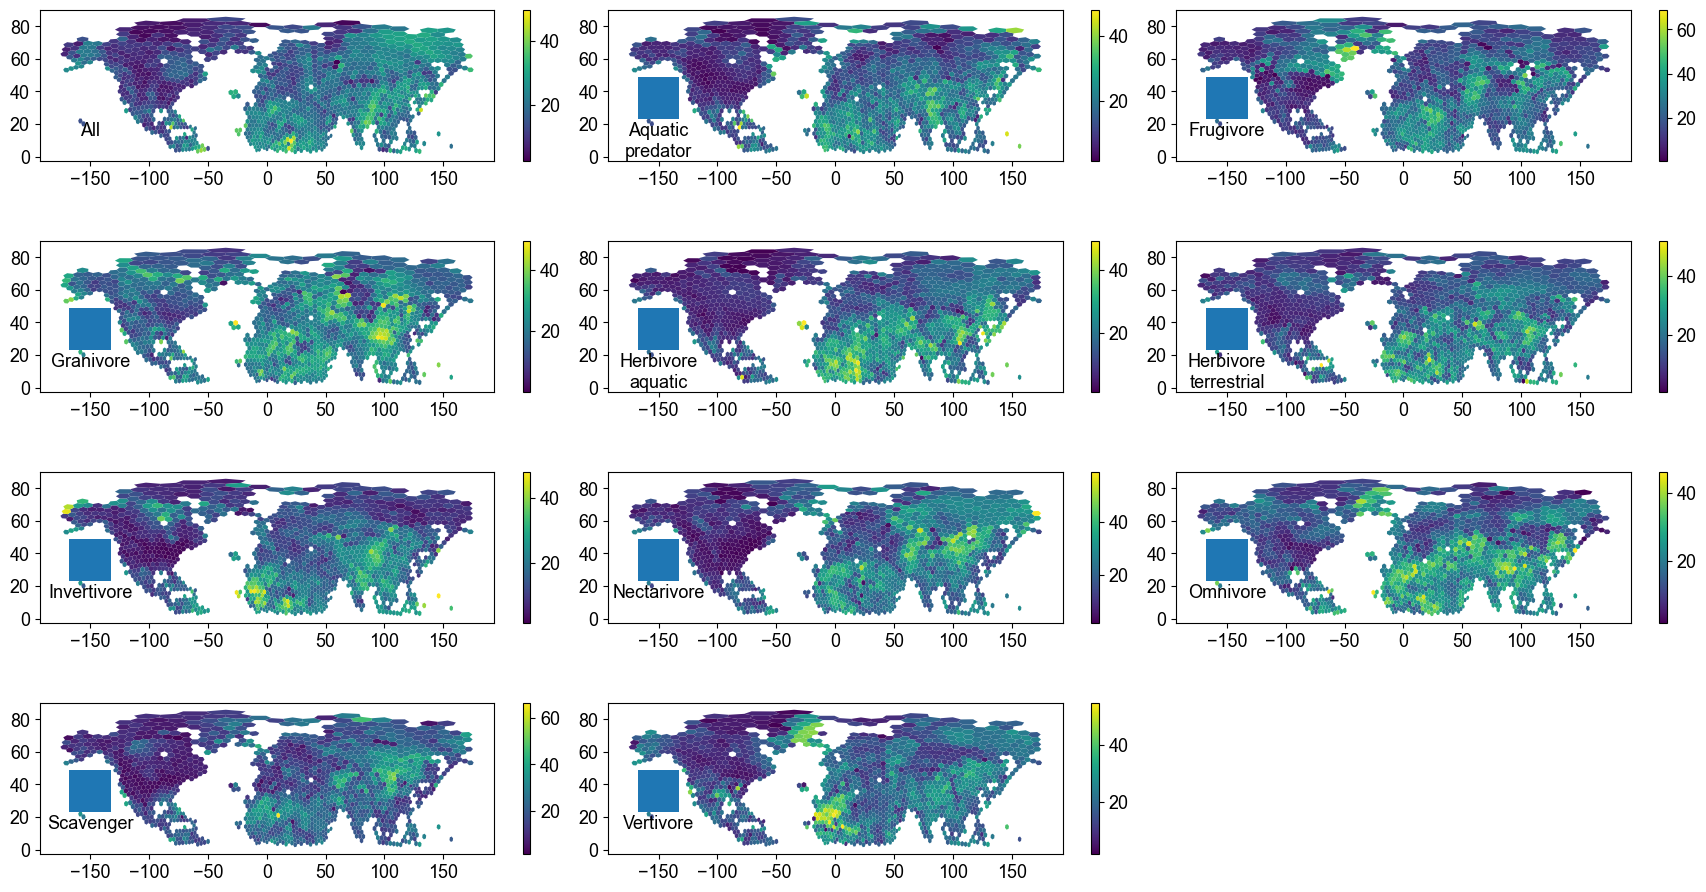

In [3]:
fig,axs = plt.subplots(4,3,figsize=((11/2) * 4, (8/2)*3))
for niche_count, niche in enumerate(color_dict.keys()):
    
    ax = axs[niche_count // 3, niche_count % 3]
    
    data = pd.read_csv(f'../../data/D07.BYM2_summary/modeling_data_with_posterior_est_niche_{niche}_env_tmin.csv')
    data = data.groupby(['h3_02','lng','lat'])[['mean_DOY_peak']].std().reset_index(drop=False)\
            .set_index('h3_02').h3.h3_to_geo_boundary().reset_index(drop=False)
    data.plot('mean_DOY_peak', ax = ax,legend=False)
    
    vmin, vmax = data['mean_DOY_peak'].min(), data['mean_DOY_peak'].max()

    norm = matplotlib.colors.Normalize(vmin=max(vmin, 0), vmax=vmax)

    cbar = plt.cm.ScalarMappable(norm=norm, cmap='viridis')
    cb = plt.colorbar(cbar, ax=ax, shrink=0.65)
    # cb.set_label(label="Sensitivity to temperature", fontsize=15)

    cb.set_ticks([i for i in cb.get_ticks() if not (i > vmax or i < vmin)])
    cb.set_ticklabels(["{:.0f}".format(float(i)) for i in cb.get_ticks()], fontsize=13)

    # add annotation
    import skunk
    from matplotlib.offsetbox import AnnotationBbox
    size=(30,30)
    
    if not niche == 'all':
        box = skunk.Box(size[0], size[1], niche)
        ab = AnnotationBbox(box, (-150,36),
                    xycoords='data',
                    boxcoords='data',
                    frameon=False)
        ax.add_artist(ab)
        
    ax.annotate(niche.split('Trophic_Niche_')[-1].replace('_',' ').capitalize().replace(' ','\n'),
            xy=(-150,21),  # Position to place the annotation text
            fontsize=13,
            ha='center',va='top')
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=13)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=13)
    
# plt.tight_layout()
fig.subplots_adjust(wspace=0, hspace=0)
axs[3, 2].remove()

svg = skunk.insert({niche:f"../../silhouette/SVG/{niche}.svg" for niche in color_dict.keys() if not niche == 'all'})

import cairosvg
cairosvg.svg2pdf(bytestring=svg, write_to='Arrival_date_variation.pdf')

# plt.tight_layout()
# fig.subplots_adjust(wspace=0, hspace=0) #left=0.1, right=0.9, top=0.9, bottom=0.1, 




## Arrival_date_mean_undertainty

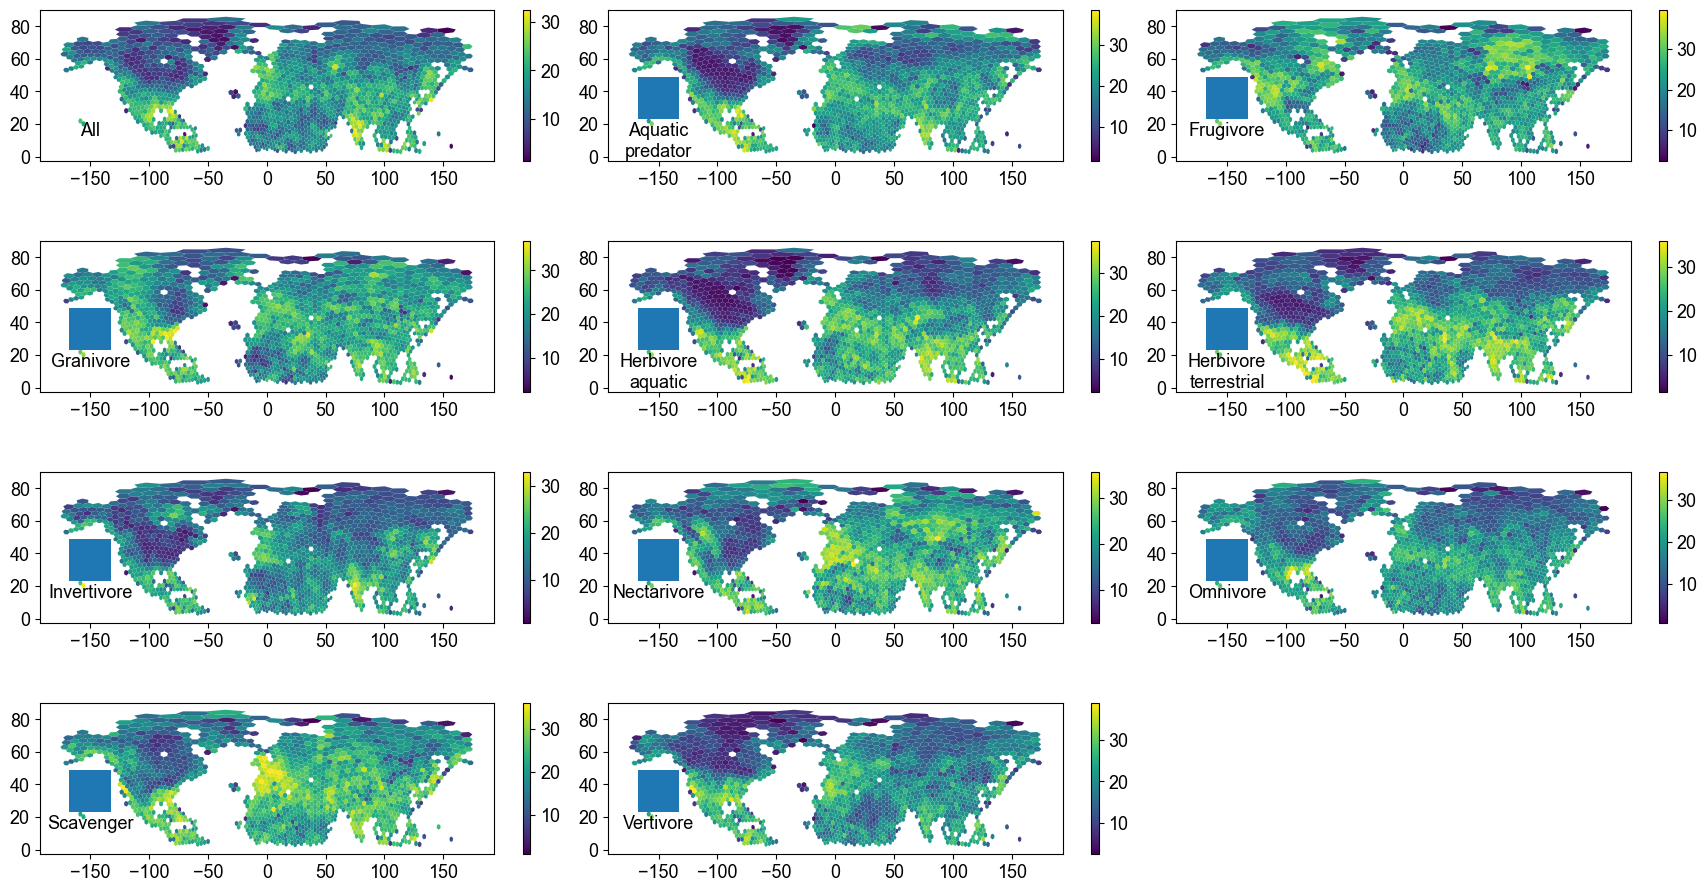

In [4]:
fig,axs = plt.subplots(4,3,figsize=((11/2) * 4, (8/2)*3))
for niche_count, niche in enumerate(color_dict.keys()):
    
    ax = axs[niche_count // 3, niche_count % 3]
    
    data = pd.read_csv(f'../../data/D07.BYM2_summary/modeling_data_with_posterior_est_niche_{niche}_env_tmin.csv')
    data = data.groupby(['h3_02','lng','lat'])[['std_DOY_peak']].mean().reset_index(drop=False)\
            .set_index('h3_02').h3.h3_to_geo_boundary().reset_index(drop=False)
    data.plot('std_DOY_peak', ax = ax,legend=False)
    
    vmin, vmax = data['std_DOY_peak'].min(), data['std_DOY_peak'].max()

    norm = matplotlib.colors.Normalize(vmin=max(vmin, 0), vmax=vmax)

    cbar = plt.cm.ScalarMappable(norm=norm, cmap='viridis')
    cb = plt.colorbar(cbar, ax=ax, shrink=0.65)
    # cb.set_label(label="Sensitivity to temperature", fontsize=15)

    cb.set_ticks([i for i in cb.get_ticks() if not (i > vmax or i < vmin)])
    cb.set_ticklabels(["{:.0f}".format(float(i)) for i in cb.get_ticks()], fontsize=13)

    # add annotation
    import skunk
    from matplotlib.offsetbox import AnnotationBbox
    size=(30,30)
    
    if not niche == 'all':
        box = skunk.Box(size[0], size[1], niche)
        ab = AnnotationBbox(box, (-150,36),
                    xycoords='data',
                    boxcoords='data',
                    frameon=False)
        ax.add_artist(ab)
        
    ax.annotate(niche.split('Trophic_Niche_')[-1].replace('_',' ').capitalize().replace(' ','\n'),
            xy=(-150,21),  # Position to place the annotation text
            fontsize=13,
            ha='center',va='top')
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=13)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=13)
    
# plt.tight_layout()
fig.subplots_adjust(wspace=0, hspace=0)
axs[3, 2].remove()

svg = skunk.insert({niche:f"../../silhouette/SVG/{niche}.svg" for niche in color_dict.keys() if not niche == 'all'})

import cairosvg
cairosvg.svg2pdf(bytestring=svg, write_to='Arrival_date_mean_undertainty.pdf')

# plt.tight_layout()
# fig.subplots_adjust(wspace=0, hspace=0) #left=0.1, right=0.9, top=0.9, bottom=0.1, 


